<a href="https://colab.research.google.com/github/adavals/bedu-datascience-f3m2/blob/main/postworks_1_al_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a name="celda-contenido"></a>
# ¿QUIEN SERÁ QUIEN?... EN LOS PRECIOS 🥇
---

- ### Introducción
- ### [Algoritmos de Clasificación No Supervisados](#celda-noSupervisados)
- ### [Algoritmos de Clasificación Supervisados](#celda-supervisados)
- ### [Regresión](#celda-Regresion)
- ### [Redes neuronales]
- ### [Conclusiones]

- [Bitácora de experimentos](https://docs.google.com/spreadsheets/d/1fWHdcRouDn93rMP-zdZHFaxXZ1RL28YBDwih8zF9FWc/edit?usp=sharing)
- [Referencias](#celda-referencias)


## Introducción

🏠 [Inicio](#celda-contenido)
<a name="celda-noSupervisados"></a>
## Algoritmos de Clasificación No Supervisados
---

#### Preparación y división de dataset para entrenamiento y prueba.

#### DESARROLLO

1. Si tienes variables numéricas, asegúrate de que estén en rangos y escalas similares. También intenta evitar colas demasiado largas o variables con muchos valores atípicos muy extremos.
2. Si tienes variables categóricas, utiliza One-Hot Encoding para convertirlas las categorías en variables binarias.
3. Separa tus datos en dataset de entrenamiento y prueba.

In [ ]:
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from scipy.stats import skew, kurtosis
import numpy as np

sns.set(style='white')
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split

In [ ]:
df_raw = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df_raw.head(3)

,producto,presentacion,marca,categoria,grupo,precio_x,fecha,marca_tienda,tipo_tienda,nombre_tienda,direccion,estado,municipio,latitud,longitud,CP,precio_y,diferencia_minimo
0,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779,20116,47.0,1.191489
1,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL PLAZA GALERIAS,"INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...",AGUASCALIENTES,AGUASCALIENTES,21.922922,-102.297692,20128,47.0,1.191489
2,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.5,2022-12-28,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,20180,47.0,1.202128


In [ ]:
# Estimados de locación y variabilidad:
def estimados(nombre):
  print(f'Promedio: {df_raw[nombre].mean()}')
  print(f'Mediana: {df_raw[nombre].median()} ')
  print(f'Media Truncada: {stats.trim_mean(df_raw[nombre], 0.1)}')
  print(f'Desviación estándar: {df_raw[nombre].std()}')
  print(f'Rango: {df_raw[nombre].max()-df_raw[nombre].min()}')
  print(f'Valor mínimo: {df_raw[nombre].min()}')
  print(f'Percentil 10: {df_raw[nombre].quantile(0.1)}')
  print(f'Percentil 25: {df_raw[nombre].quantile(0.25)}')
  print(f'Percentil 50: {df_raw[nombre].median()}')
  print(f'Percentil 75: {df_raw[nombre].quantile(0.75)}')
  print(f'Percentil 90: {df_raw[nombre].quantile(0.9)}')
  print(f'Valor máximo: {df_raw[nombre].max()}')
  print(f'Rango Intercuartil: {df_raw[nombre].quantile(0.75) - df_raw[nombre].quantile(0.25)}')

In [ ]:
estimados('diferencia_minimo')

Promedio: 1.4384343828960553
Mediana: 1.3311111111111111 
Media Truncada: 1.3643059530229693
Desviación estándar: 0.4576278763149921
Rango: 10.197509412105417
Valor mínimo: 1.0
Percentil 10: 1.0633816811052663
Percentil 25: 1.1685393258426966
Percentil 50: 1.3311111111111111
Percentil 75: 1.5555555555555556
Percentil 90: 1.878
Valor máximo: 11.197509412105417
Rango Intercuartil: 0.387016229712859


Para un 90% de los datos el porcentaje de diferencia con el precio mínimo es de 1.87, esto implicaría que lo que ocurre más frecuentemente es que el precio de un producto es menos del doble del precio mínimo. Hay un 10 % de casos extremos en que el precio está entre el doble y once veces el precio mínimo

In [ ]:
df_raw.sort_values(by='diferencia_minimo',ascending=False).head(3)

,producto,presentacion,marca,categoria,grupo,precio_x,fecha,marca_tienda,tipo_tienda,nombre_tienda,direccion,estado,municipio,latitud,longitud,CP,precio_y,diferencia_minimo
64625,MONTELUKAST,20 COMPRIMIDOS O TABLETAS DE 10 MG.,S/M,MEDICAMENTOS,MEDICAMENTOS,386.65,2022-12-29,FARMACIA LA LUZ,FARMACIAS,FARMACIA DE LA LUZ,"GUERRERO 145, CALLEJON DE CORREA Y TACUBA, COL...",ZACATECAS,ZACATECAS,22.772126,-102.571900,98000,34.53,11.197509
209634,TEMPRA,CAJA 24 TABLETAS. 24 HRS.,S/M,MEDICAMENTOS,MEDICAMENTOS,139.00,2022-12-29,SANBORN S HNOS.,FARMACIAS,SANBORNS SUCURSAL AZCAPOTZALCO,"AZCAPOTZALCO 527, ESQ. 16 DE SEPTIEMBRE, COL. ...",CIUDAD DE MÉXICO,AZCAPOTZALCO,19.478129,-99.186518,02000,14.00,9.928571
209735,TEMPRA,CAJA 24 TABLETAS. 24 HRS.,S/M,MEDICAMENTOS,MEDICAMENTOS,139.00,2022-12-29,SANBORN S HNOS.,FARMACIAS,SANBORNS,"HIDALGO 212, COL. CENTRO, CP. 98000",ZACATECAS,ZACATECAS,22.773333,-102.573643,98000,14.00,9.928571


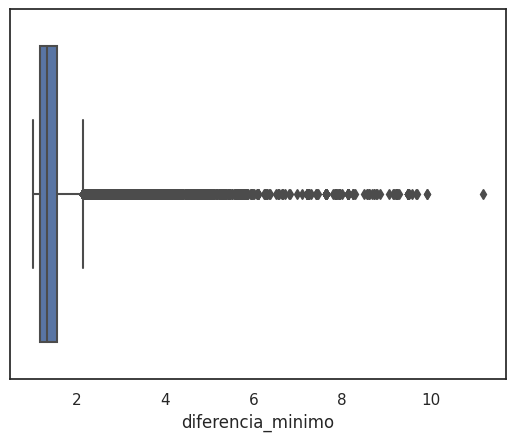

In [ ]:
# Revisión gráfica de casos extremos
sns.boxplot(x=df_raw['diferencia_minimo']);

In [ ]:
#Filtrado por rango intercualtilico
def filtradoIQR(nombre):
  iqr = df_raw[nombre].quantile(0.75) - df_raw[nombre].quantile(0.25)
  filtro_inferior = df_raw[nombre] > df_raw[nombre].quantile(0.25) - (iqr * 1.5)
  filtro_superior = df_raw[nombre] < df_raw[nombre].quantile(0.75) + (iqr * 1.5)
  filtro_0 = df_raw[nombre] > 0
  df_filtrado = df_raw[filtro_inferior & filtro_superior]
  print('                      Sin Filtro   Con Filtro IQR')
  print(f'Media:          {df_raw[nombre].mean():16.2f} {df_filtrado[nombre].mean():16.2f}')
  print(f'Mediana:        {df_raw[nombre].median():16.2f} {df_filtrado[nombre].median():16.2f} ')
  print(f'Media Truncada: {stats.trim_mean(df_raw[nombre], 0.1):16.2f} {stats.trim_mean(df_filtrado[nombre], 0.1):16.2f}')
  print(f'Desviación est: {df_raw[nombre].std():16.2f} {df_filtrado[nombre].std():16.2f}')
  sns.boxplot(x=df_filtrado[nombre]);
  return df_filtrado
  

                      Sin Filtro   Con Filtro IQR
Media:                      1.44             1.35
Mediana:                    1.33             1.31 
Media Truncada:             1.36             1.33
Desviación est:             0.46             0.25


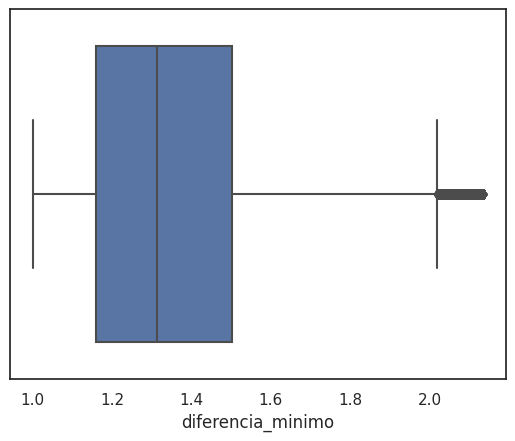

In [ ]:
df_filtrado = filtradoIQR('diferencia_minimo')

In [ ]:
# Funciones de apoyo para tabla de frecuencias y parametros de distribución
def tablaFrecuencias(dataframe, nombre):
  valores = dataframe[nombre]
  segmentos = pd.cut(valores, 20)
  print(dataframe[nombre].groupby(segmentos).count())

def parametrosDistribucion(dataframe, nombre):
  print(f'Curtosis: {kurtosis(dataframe[nombre])}')
  print(f'Asimetría: {skew(dataframe[nombre])}')
  sns.distplot(dataframe[nombre], kde=True, norm_hist=False, bins=20);

In [ ]:
tablaFrecuencias(df_filtrado, 'diferencia_minimo')

diferencia_minimo
(0.999, 1.057]    23778
(1.057, 1.114]    19788
(1.114, 1.17]     21109
(1.17, 1.227]     22201
(1.227, 1.284]    22777
(1.284, 1.341]    22163
(1.341, 1.398]    17850
(1.398, 1.454]    17327
(1.454, 1.511]    14729
(1.511, 1.568]    12776
(1.568, 1.625]     9298
(1.625, 1.682]     8471
(1.682, 1.738]     6474
(1.738, 1.795]     5220
(1.795, 1.852]     4582
(1.852, 1.909]     2896
(1.909, 1.966]     2492
(1.966, 2.022]     2922
(2.022, 2.079]     1857
(2.079, 2.136]     1487
Name: diferencia_minimo, dtype: int64


Curtosis: 0.09185584849532136
Asimetría: 0.7627687722081203


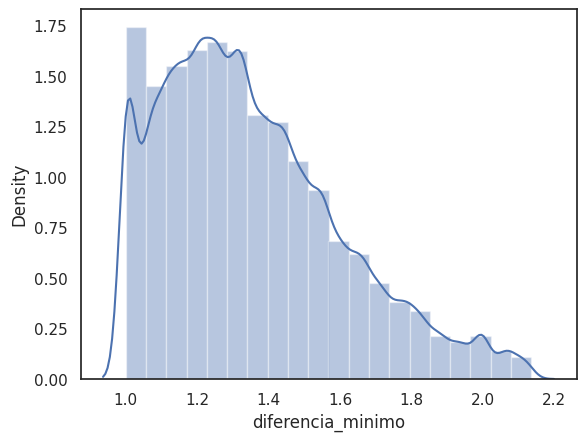

In [ ]:
parametrosDistribucion(df_filtrado, 'diferencia_minimo')

---
  - El porcentaje de diferencia con el precio mínimo presenta una distribución con cola larga
  - Asimetría positiva, 0.76, con cola más larga hacia la derecha
  - Curtosis positiva, 0.09, presenta algunos datos más alejados de la media
---

In [ ]:
df_filtrado.shape

(240197, 18)

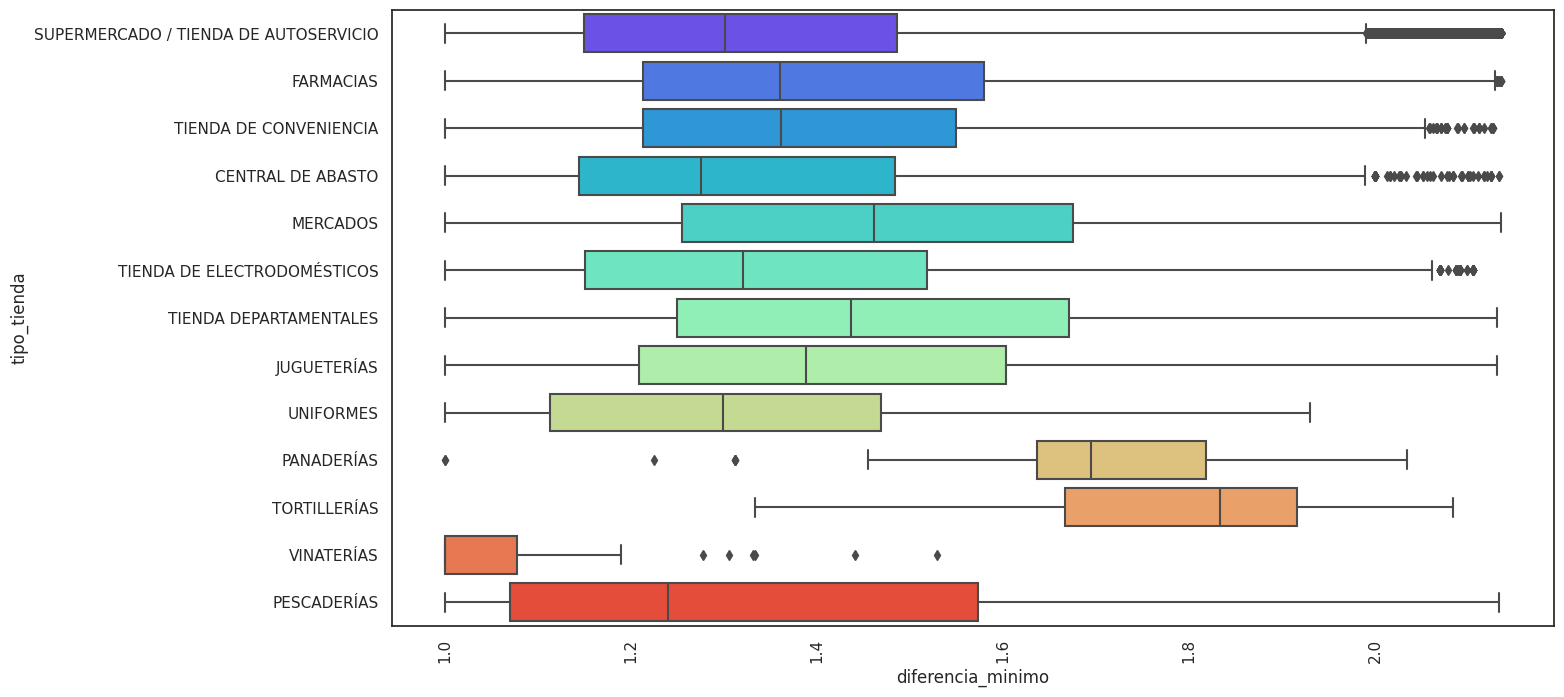

In [ ]:
plt.figure(figsize=(15,8))
ax = sns.boxplot(x= 'diferencia_minimo',y='tipo_tienda', data = df_filtrado, palette = 'rainbow')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

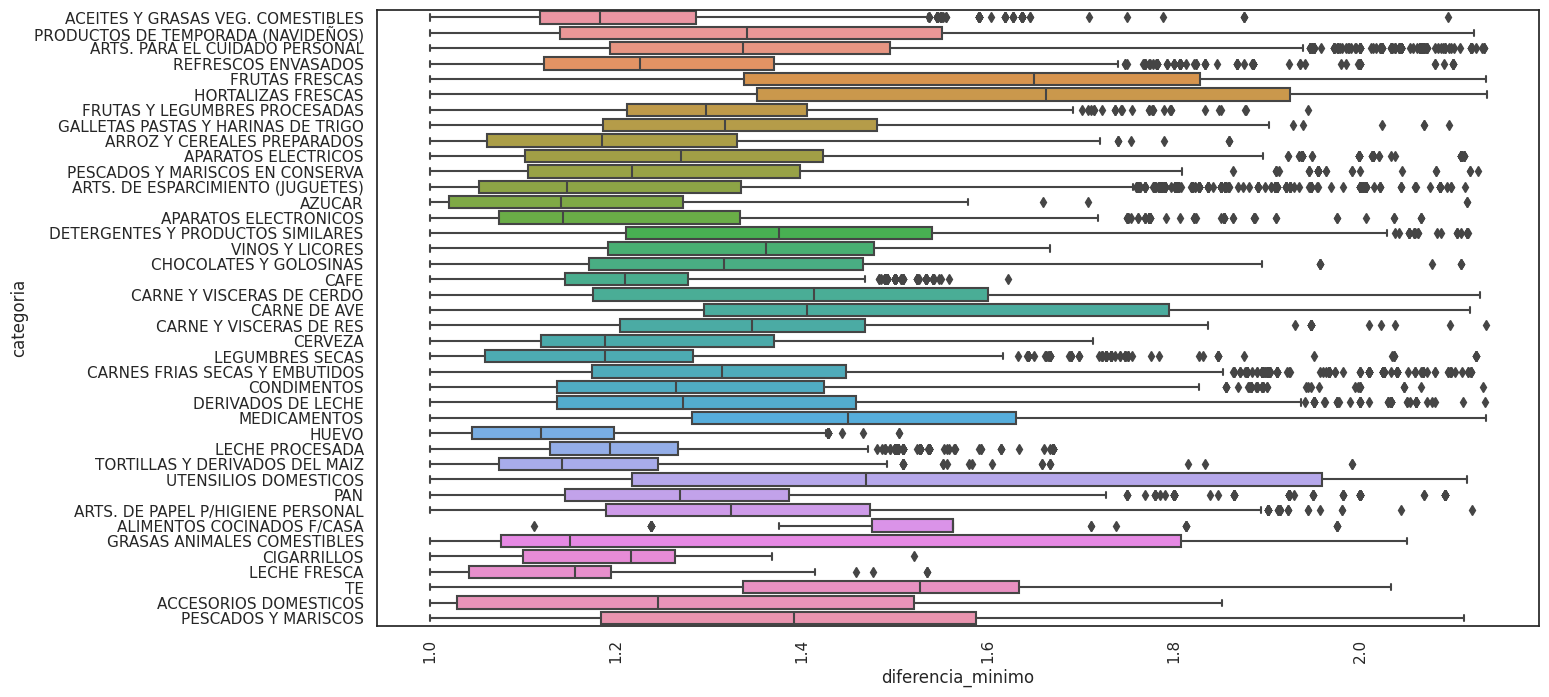

In [ ]:
df_filtrado2 = df_filtrado[df_filtrado['tipo_tienda']=='SUPERMERCADO / TIENDA DE AUTOSERVICIO']
plt.figure(figsize=(15,8))
ax = sns.boxplot(x='diferencia_minimo', y='categoria', data = df_filtrado2)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90);

In [ ]:
# Codificación de variables categóricas para revisar correlacion con la proporción de diferencia con el mínimo precio
dfc = df_raw.drop(columns=[ 'precio_x', 'nombre_tienda', 'fecha', 'direccion', 'longitud', 'latitud', 'municipio', 'CP', 'precio_y'])
def codificacion_categoria(dataframe, nombre):
  dataframe[nombre] = dataframe[nombre].astype('category').cat.codes
codificacion_categoria(dfc, 'producto')
codificacion_categoria(dfc, 'presentacion')
codificacion_categoria(dfc, 'marca')
codificacion_categoria(dfc, 'categoria')
codificacion_categoria(dfc, 'grupo')
codificacion_categoria(dfc, 'marca_tienda')
codificacion_categoria(dfc, 'tipo_tienda')
codificacion_categoria(dfc, 'estado')

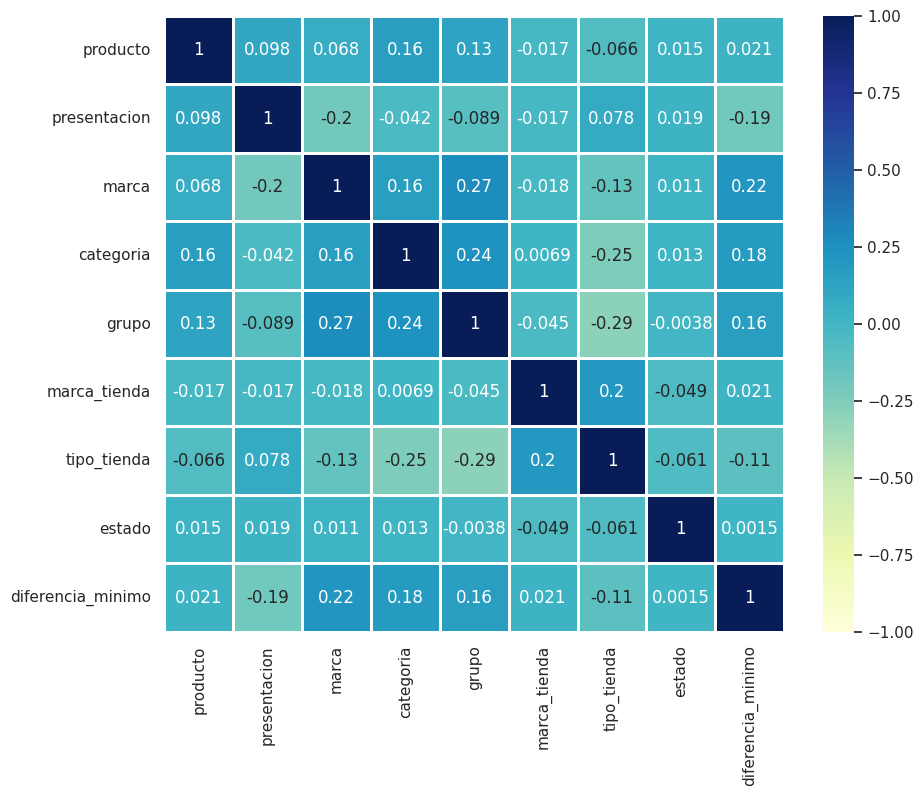

In [ ]:
plt.figure(figsize=(10,8))
ax = sns.heatmap(dfc.corr(), vmin=-1, vmax=1, annot=True, cmap="YlGnBu", linewidths=1)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# X = df_raw.drop(columns=['fecha','precio_y', 'direccion'])
X = df_raw[['marca_tienda','diferencia_minimo']]
X.head(3)

,marca_tienda,diferencia_minimo
0,MEGA SORIANA,1.191489
1,WAL-MART,1.191489
2,BODEGA AURRERA,1.202128


In [ ]:
#categorical_features_idx = [0,1,2,3,4,6,7,8,9,10,13]
categorical_features_idx = [0]

In [ ]:
mark_array=X.values

In [ ]:
from kmodes.kprototypes import KPrototypes

In [ ]:
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 21462, ncost: 63473.62515963671
Run: 1, iteration: 2/20, moves: 8737, ncost: 63424.864084189656
Run: 1, iteration: 3/20, moves: 3738, ncost: 63411.61461823842
Run: 1, iteration: 4/20, moves: 1733, ncost: 63408.345500874224
Run: 1, iteration: 5/20, moves: 2497, ncost: 63394.08759516335
Run: 1, iteration: 6/20, moves: 1370, ncost: 63392.02967563737
Run: 1, iteration: 7/20, moves: 199, ncost: 63391.892091340786
Run: 1, iteration: 8/20, moves: 69, ncost: 63391.89034140623
Run: 1, iteration: 9/20, moves: 1, ncost: 63391.89034102997
Run: 1, iteration: 10/20, moves: 0, ncost: 63391.89034102997
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 97564, ncost: 64806.55552097246
Run: 2, iteration: 2/20, moves: 28211, ncost: 63315.51526852664
Run: 2, it

In [ ]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['1.21127504449046' 'WAL-MART']
 ['2.8125682354640613' 'WAL-MART']
 ['1.6009505674512619' 'HIPERMERCADO SORIANA']]


In [ ]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)

In [ ]:
df_raw['cluster'] = list(clusters)

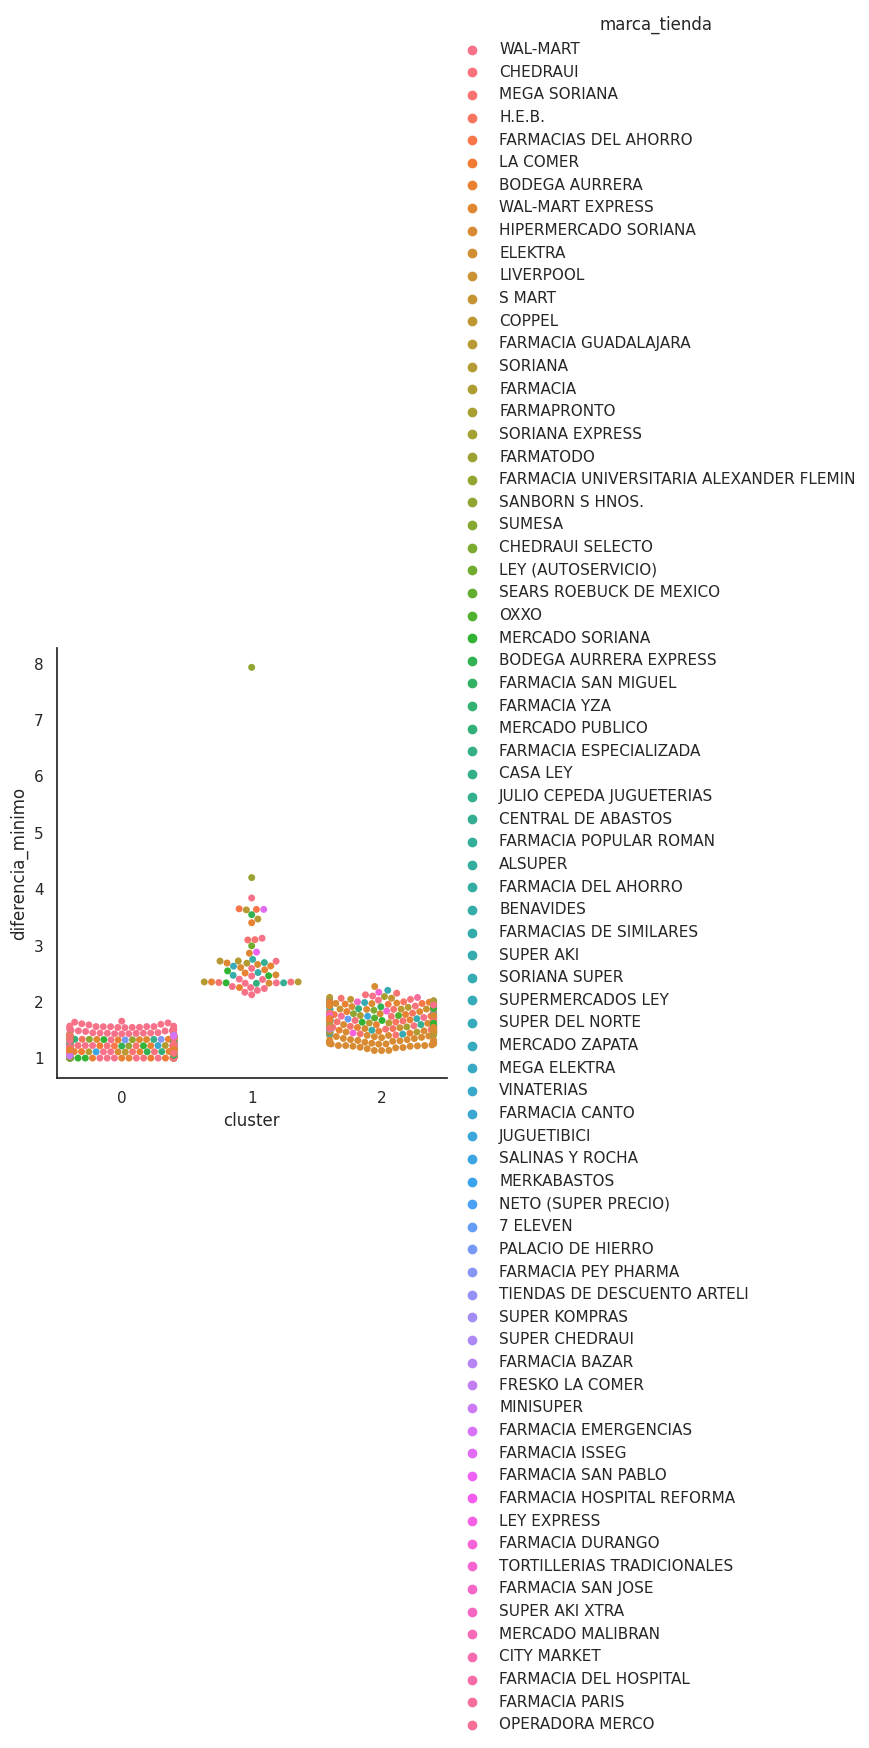

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='marca_tienda', kind='swarm', data=df_raw.sample(n=1000))

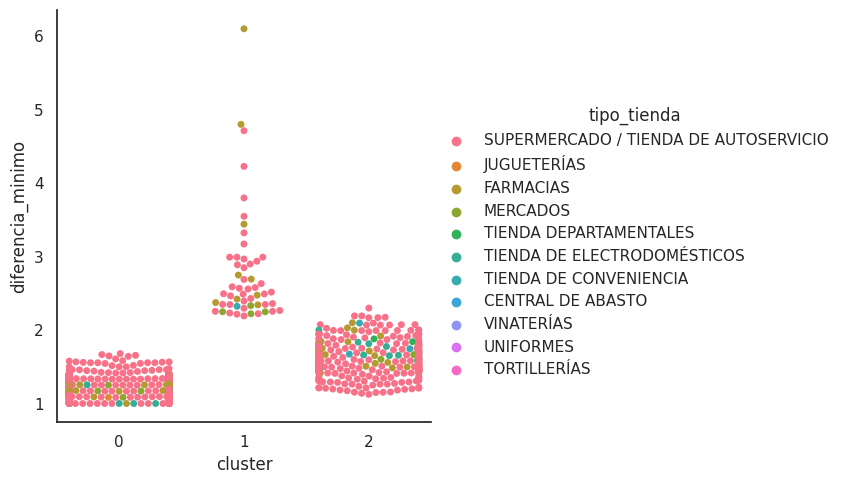

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='tipo_tienda', kind='swarm', data=df_raw.sample(n=1000))

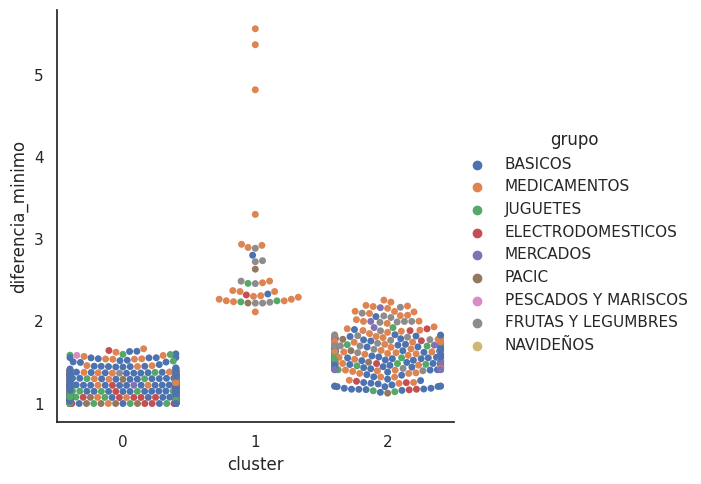

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='grupo', kind='swarm', data=df_raw.sample(n=1000))

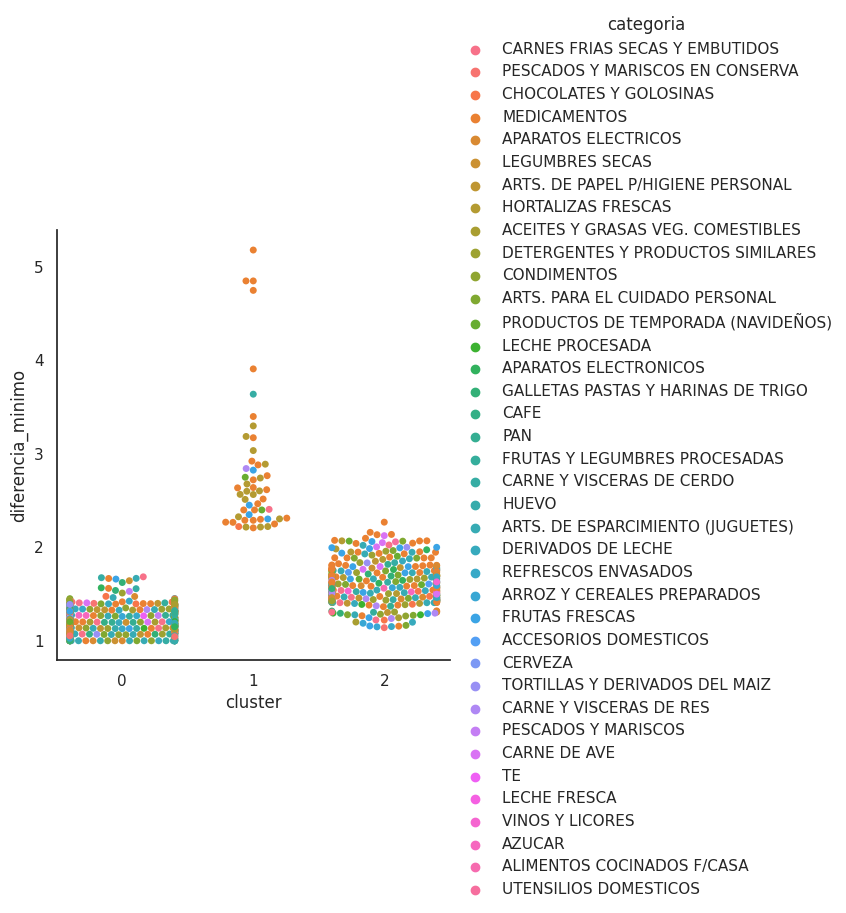

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='categoria', kind='swarm', data=df_raw.sample(n=1000))

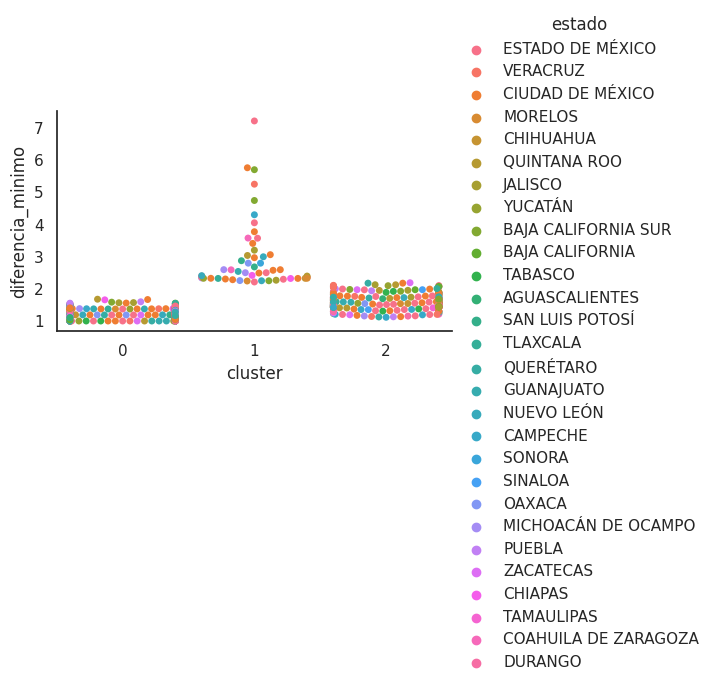

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='estado', kind='swarm', data=df_raw.sample(n=1000))

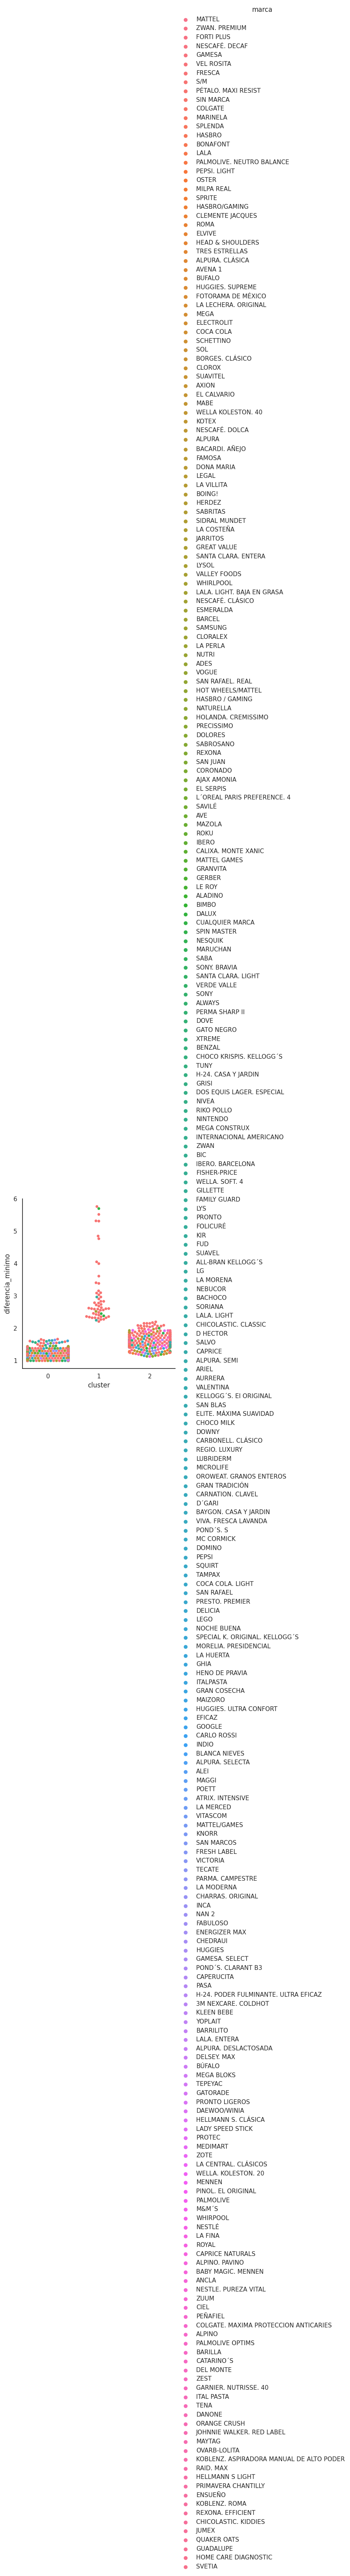

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='marca', kind='swarm', data=df_raw.sample(n=1000))

In [ ]:
# Descripción básica de clusters
df_cluster0 = df_raw[df_raw['cluster']==0]
df_cluster1 = df_raw[df_raw['cluster']==1]
df_cluster2 = df_raw[df_raw['cluster']==2]
print("                   \tCluster 0   \tCluster 1    \tCluster 2")
print(f"Tamaño            \t{df_cluster0.shape[0]:9} \t{df_cluster1.shape[0]:9} \t{df_cluster2.shape[0]:9}")
print(f"Diferencia mínima \t{df_cluster0['diferencia_minimo'].min():9.2f} \t{df_cluster1['diferencia_minimo'].min():9.2f} \t{df_cluster2['diferencia_minimo'].min():9.2f}")
print(f"Diferencia máxima \t{df_cluster0['diferencia_minimo'].max():9.2f} \t{df_cluster1['diferencia_minimo'].max():9.2f} \t{df_cluster2['diferencia_minimo'].max():9.2f}")

                   	Cluster 0   	Cluster 1    	Cluster 2
Tamaño            	   149911 	    13941 	    91664
Diferencia mínima 	     1.00 	     2.11 	     1.11
Diferencia máxima 	     1.70 	    11.20 	     2.30


### Hallazgos:
- En cuanto a la diferencia con el precio mínimo:
  - En el cluster 0 se ubican diferencias menores a 1.7, esto es, ningún precio llega a ser el doble del precio mínimo.
  - En el cluster 1 se ubican las diferencias mayores, esto es, todos los precios están entre el doble y once veces el precio mínimo.
  - En el tercer cluster se ubican diferencias intermedias entre 1.11 veces el precio mínimo y un máximo de 2.3.
  - El cluster 0 es 10 veces más grande que el cluster 1, asi que es más frecuente que la diferencia con el precio mínimo sea baja. Las diferencias respecto al precio mínimo altas son mucho menores.
- En cuanto a la variable marca_tienda no parece haber alguna tendencia en los grupos a que predomine alguna marca de tienda, esto es que en los diferentes clusters, de acuerdo a la diferencia con el precio mínimo, la marca de la tienda puede aparecer en los tres.
- Se observa una ligera tendencia en los grupos respecto a las variables grupo, categoría y marca de producto.

## Mapa de tiendas

In [ ]:
!pip install geopandas

In [ ]:
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point, LineString

In [ ]:
centroide = [Point(xy) for xy in zip(df_raw["longitud"], df_raw["latitud"])]
df_geo = GeoDataFrame(df_raw, geometry=centroide, crs = 'epsg:4326')

In [ ]:
df_mapa = gpd.read_file('/vsicurl/https://github.com/adavals/bedu-datascience-f3m2/raw/main/dat/mapa_mexico/Division_Municipal_Mexico_2010.shp')\
        .set_index('CLAVE')\
        .to_crs(epsg=4326) 

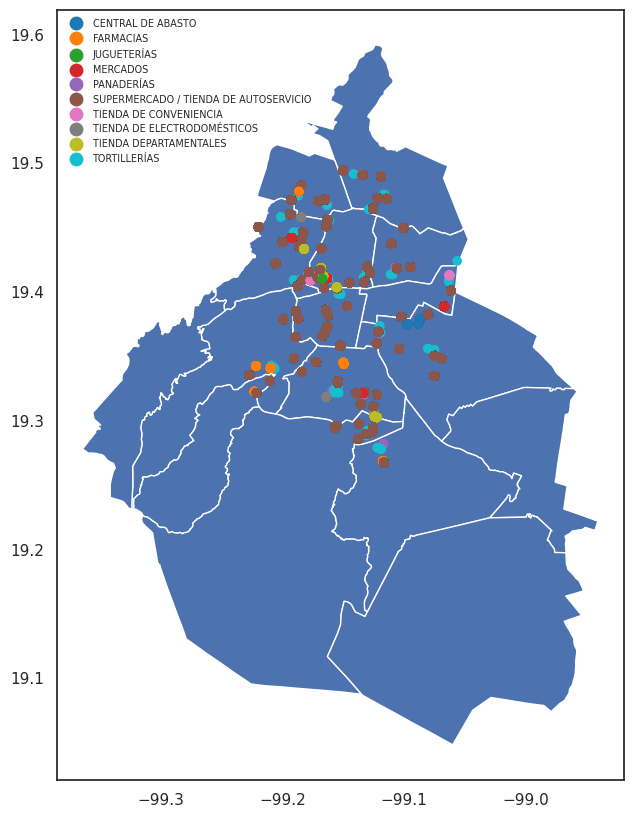

In [ ]:
estado_mapa = 'D.F.'
estado_productos = 'CIUDAD DE MÉXICO'
mapa = df_mapa[df_mapa['NOMEDO']==estado_mapa]['geometry'].plot(figsize=(10,10))
df_geo[df_geo['estado'] == estado_productos].plot('tipo_tienda', ax= mapa, legend = True, legend_kwds = {'loc': 'upper left', 'fontsize':'xx-small', 'framealpha':0}, figsize=(15,15));


In [ ]:
df_raw[df_raw['cluster']==0].head(10)

,producto,presentacion,marca,categoria,grupo,precio_x,fecha,marca_tienda,tipo_tienda,nombre_tienda,direccion,estado,municipio,latitud,longitud,CP,precio_y,diferencia_minimo,cluster
0,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.00,2022-12-26,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779,20116,47.0,1.191489,0
1,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.00,2022-12-26,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL PLAZA GALERIAS,"INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...",AGUASCALIENTES,AGUASCALIENTES,21.922922,-102.297692,20128,47.0,1.191489,0
2,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.50,2022-12-28,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,20180,47.0,1.202128,0
3,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,57.50,2022-12-28,FARMACIA GUADALAJARA,FARMACIAS,FARMACIA GUADALAJARA SUCURSAL DEL VALLE,"AGUASCALIENTES PTE. 908, ESQ. DINAMARCA, COL. ...",AGUASCALIENTES,AGUASCALIENTES,21.876563,-102.318612,20080,47.0,1.223404,0
4,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,49.90,2022-12-28,OXXO,TIENDA DE CONVENIENCIA,OXXO SUCURSAL MONTORO AGUASCALIENTES,"JUAN DE MONTORO 201, ESQUINA DR. JESUS DIAZ DE...",AGUASCALIENTES,AGUASCALIENTES,21.880795,-102.294251,20000,47.0,1.061702,0
5,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,55.50,2022-12-29,CHEDRAUI,SUPERMERCADO / TIENDA DE AUTOSERVICIO,CHEDRAUI SUCURSAL AGUASCALIENTES,"BLVD. JOSE MA. CHAVEZ 1809, ENTRE VALENTE QUIN...",AGUASCALIENTES,AGUASCALIENTES,21.854349,-102.294259,20280,47.0,1.180851,0
6,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,MERCADOS,55.59,2022-12-29,CENTRAL DE ABASTOS,CENTRAL DE ABASTO,FRANCO SOLO CALIDAD SUCURSAL CENTRAL DE ABASTO,"AV. MAHATMA GANDHI S/N. BLOCK H LOCAL 20, INT....",AGUASCALIENTES,AGUASCALIENTES,21.832072,-102.292976,20280,47.0,1.182766,0
7,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,49.90,2022-12-29,OXXO,TIENDA DE CONVENIENCIA,OXXO SUCURSAL MORELOS 2,"JOSE MARIA MORELOS Y PAVON 222, ENTRE IGNACIO ...",AGUASCALIENTES,AGUASCALIENTES,21.882488,-102.294960,20000,47.0,1.061702,0
9,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,55.90,2022-12-26,SUPERMERCADOS LEY,SUPERMERCADO / TIENDA DE AUTOSERVICIO,LEY SUCURSAL OTAY (1051),"BLVD. LAZARO CARDENAS Y CALZ. TECNOLOGICO S/N,...",BAJA CALIFORNIA,TIJUANA,32.532672,-116.953121,22390,47.0,1.189362,0
10,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,50.00,2022-12-28,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL TIJUANA HIPODROMO,"AGUACALIENTE, ESQ. PASEO DE LAS AMERICAS 11999...",BAJA CALIFORNIA,TIJUANA,32.508604,-116.992893,22024,47.0,1.063830,0


### Experimento 2, usar la variable grupo en lugar de marca_tienda para generar clusters

In [ ]:
# Experimento 2, usar la variable grupo en lugar de marca_tienda para generar clusters
X = df_raw[['grupo','diferencia_minimo']]
X.head(3)

,grupo,diferencia_minimo
0,BASICOS,1.191489
1,BASICOS,1.191489
2,BASICOS,1.202128


In [ ]:
categorical_features_idx = [0]
mark_array=X.values
kproto = KPrototypes(n_clusters=3, verbose=2, max_iter=20).fit(mark_array, categorical=categorical_features_idx)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 1, iteration: 1/20, moves: 11631, ncost: 45877.78181346211
Run: 1, iteration: 2/20, moves: 39532, ncost: 39801.91292100037
Run: 1, iteration: 3/20, moves: 9856, ncost: 39460.24626861465
Run: 1, iteration: 4/20, moves: 2521, ncost: 39392.46647495937
Run: 1, iteration: 5/20, moves: 1516, ncost: 39368.919379880615
Run: 1, iteration: 6/20, moves: 934, ncost: 39363.57515683612
Run: 1, iteration: 7/20, moves: 209, ncost: 39363.34666257224
Run: 1, iteration: 8/20, moves: 25, ncost: 39363.344903971
Run: 1, iteration: 9/20, moves: 4, ncost: 39363.344857636264
Run: 1, iteration: 10/20, moves: 0, ncost: 39363.344857636264
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run: 2, iteration: 1/20, moves: 50119, ncost: 43177.74701817975
Run: 2, iteration: 2/20, moves: 11231, ncost: 42185.13178958717
Run: 2, iter

In [ ]:
# Cluster Centroids
print(kproto.cluster_centroids_)

[['1.2670799316033108' 'BASICOS']
 ['2.775342209727484' 'MEDICAMENTOS']
 ['1.541324113493222' 'MEDICAMENTOS']]


In [ ]:
clusters = kproto.predict(mark_array, categorical=categorical_features_idx)
df_raw['cluster'] = list(clusters)

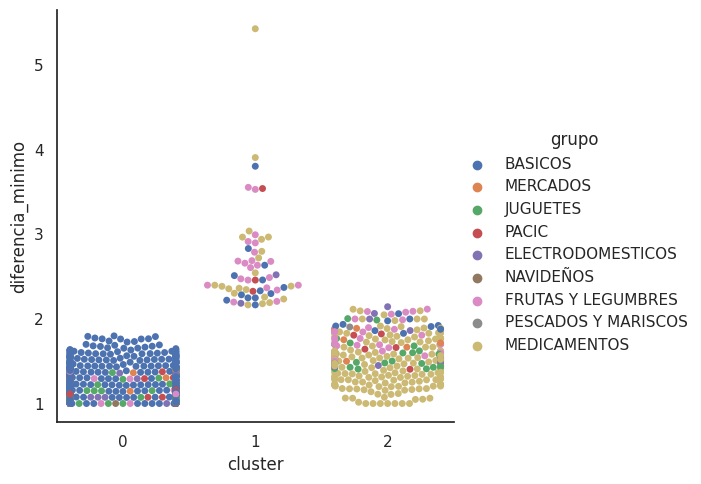

In [ ]:
sns.catplot(x='cluster', y='diferencia_minimo', hue='grupo', kind='swarm', data=df_raw.sample(n=1000))

In [ ]:
# Descripción básica de clusters
df_cluster0 = df_raw[df_raw['cluster']==0]
df_cluster1 = df_raw[df_raw['cluster']==1]
df_cluster2 = df_raw[df_raw['cluster']==2]
print("                   \tCluster 0   \tCluster 1    \tCluster 2")
print(f"Tamaño            \t{df_cluster0.shape[0]:9} \t{df_cluster1.shape[0]:9} \t{df_cluster2.shape[0]:9}")
print(f"Diferencia mínima \t{df_cluster0['diferencia_minimo'].min():9.2f} \t{df_cluster1['diferencia_minimo'].min():9.2f} \t{df_cluster2['diferencia_minimo'].min():9.2f}")
print(f"Diferencia máxima \t{df_cluster0['diferencia_minimo'].max():9.2f} \t{df_cluster1['diferencia_minimo'].max():9.2f} \t{df_cluster2['diferencia_minimo'].max():9.2f}")

                   	Cluster 0   	Cluster 1    	Cluster 2
Tamaño            	   162720 	    14858 	    77938
Diferencia mínima 	     1.00 	     2.16 	     1.00
Diferencia máxima 	     1.82 	    11.20 	     2.16


### Experimento 2:
- En cuanto a la diferencia con el precio mínimo:
  - En el cluster 0 se ubican las diferencias mayores, esto es, todos los precios están entre el doble y once veces el precio mínimo.
  - En el cluster 1 se ubican diferencias menores ahora hasta 1.82, esto es, ningún precio llega a ser el doble del precio mínimo.
  - En el tercer cluster se ubican diferencias intermedias, pero ahora si incluye desde el precio mínimo, 1 hasta el doble, 2.16 veces.
  - Se observa que hay tendencias en los grupos de productos a ubicarse en cierto cluster, por ejemplo: los medicamentos y las frutas y legumbres están con frecuencia en el cluster donde hay más diferencia con el precio mínimo, esto es que como consumidores es recomendable comparar el precio de un medicamento o frutas y legumbres con más cuidado que con otros grupos de producto.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Salvar archivo con información de clusters
df_raw.to_csv('/content/drive/MyDrive/BeduDSF3M2/postwork/532022_kModes_grupo.csv')

🏠 [Inicio](#celda-contenido)
<a name="celda-supervisados"></a>
## Algoritmos de Clasificación Supervisados
---

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df.head(3)

,producto,presentacion,marca,categoria,grupo,precio_x,fecha,marca_tienda,tipo_tienda,nombre_tienda,direccion,estado,municipio,latitud,longitud,CP,precio_y,diferencia_minimo
0,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779,20116,47.0,1.191489
1,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL PLAZA GALERIAS,"INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...",AGUASCALIENTES,AGUASCALIENTES,21.922922,-102.297692,20128,47.0,1.191489
2,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.5,2022-12-28,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,20180,47.0,1.202128


### Creación de variable de salida para el árbol de decisión
En el atributo clase_precio se asignó la clasificación del precio del producto, considerando cuánto varía respecto al precio mínimo. Como punto de partida se designaron 3 rangos en base a la variable diferencia_minimo y los resultados de los clusters generados con el algoritmo k-modes.
- clase 1:   entre 1.00 y 1.75
- clase 2:   entre 1.75 y 2.15
- clase 3:   mayor a 2.15

In [ ]:
def condition(x):
    if x<1.75:
        return 1
    elif x<2.15:
        return 2
    else:
        return 3

In [ ]:
df["clase_precio"] = df['diferencia_minimo'].apply(condition)

In [ ]:
df['grupo'].unique()

array(['BASICOS', 'MERCADOS', 'PACIC', 'FRUTAS Y LEGUMBRES',
       'ELECTRODOMESTICOS', 'JUGUETES', 'MEDICAMENTOS', 'NAVIDEÑOS',
       'PESCADOS Y MARISCOS'], dtype=object)

In [ ]:
df['categoria'].unique()

array(['ACEITES Y GRASAS VEG. COMESTIBLES',
       'PRODUCTOS DE TEMPORADA (NAVIDEÑOS)',
       'ARTS. PARA EL CUIDADO PERSONAL', 'REFRESCOS ENVASADOS',
       'FRUTAS FRESCAS', 'HORTALIZAS FRESCAS',
       'FRUTAS Y LEGUMBRES PROCESADAS',
       'GALLETAS PASTAS Y HARINAS DE TRIGO',
       'ARROZ Y CEREALES PREPARADOS', 'APARATOS ELECTRICOS',
       'PESCADOS Y MARISCOS EN CONSERVA',
       'ARTS. DE ESPARCIMIENTO (JUGUETES)', 'AZUCAR',
       'APARATOS ELECTRONICOS', 'DETERGENTES Y PRODUCTOS SIMILARES',
       'VINOS Y LICORES', 'CHOCOLATES Y GOLOSINAS', 'CAFE',
       'CARNE Y VISCERAS DE CERDO', 'CARNE DE AVE',
       'CARNE Y VISCERAS DE RES', 'CERVEZA', 'LEGUMBRES SECAS',
       'CARNES FRIAS SECAS Y EMBUTIDOS', 'CONDIMENTOS',
       'DERIVADOS DE LECHE', 'MEDICAMENTOS', 'HUEVO', 'LECHE PROCESADA',
       'TORTILLAS Y DERIVADOS DEL MAIZ', 'UTENSILIOS DOMESTICOS', 'PAN',
       'ARTS. DE PAPEL P/HIGIENE PERSONAL', 'ALIMENTOS COCINADOS F/CASA',
       'GRASAS ANIMALES COMESTIBLES',

In [ ]:
df['estado'].unique()

array(['AGUASCALIENTES', 'BAJA CALIFORNIA', 'BAJA CALIFORNIA SUR',
       'CAMPECHE', 'CHIAPAS', 'CHIHUAHUA', 'CIUDAD DE MÉXICO',
       'COAHUILA DE ZARAGOZA', 'DURANGO', 'ESTADO DE MÉXICO',
       'GUANAJUATO', 'GUERRERO', 'JALISCO', 'MICHOACÁN DE OCAMPO',
       'MORELOS', 'NUEVO LEÓN', 'OAXACA', 'PUEBLA', 'QUERÉTARO',
       'QUINTANA ROO', 'SAN LUIS POTOSÍ', 'SINALOA', 'SONORA', 'TABASCO',
       'TAMAULIPAS', 'TLAXCALA', 'VERACRUZ', 'YUCATÁN', 'ZACATECAS'],
      dtype=object)

In [ ]:
# Dataset filtrado debido a una alta cantidad de valores en las variables categóricas
# PACIC : Paquete contra la inflación y la carestía
filter1 = df['grupo']=='PACIC'
filter2 = df['estado']=='CIUDAD DE MÉXICO'

df = df[filter1 & filter2]

In [ ]:
df.drop(["presentacion","fecha", "direccion", "nombre_tienda", "estado", "latitud", "longitud","precio_y","diferencia_minimo"], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) < 55:
    categorical_col.append(column)

In [ ]:
categorical_col

['producto',
 'marca',
 'categoria',
 'grupo',
 'marca_tienda',
 'tipo_tienda',
 'municipio']

In [ ]:
df.head(3)

,producto,marca,categoria,grupo,precio_x,marca_tienda,tipo_tienda,municipio,CP,clase_precio
352,ACEITE,AVE,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,39.0,LA COMER,SUPERMERCADO / TIENDA DE AUTOSERVICIO,ÁLVARO OBREGÓN,01770,1
353,ACEITE,AVE,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,39.0,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,ÁLVARO OBREGÓN,10200,1
354,ACEITE,AVE,ACEITES Y GRASAS VEG. COMESTIBLES,PACIC,37.0,SUMESA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,ÁLVARO OBREGÓN,01000,1


In [ ]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop("clase_precio", axis=1)
y = df.clase_precio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
tree_clf = DecisionTreeClassifier()
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = tree_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[846,   2,   0],
       [  4,  66,   1],
       [  4,   1,  62]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import precision_score, recall_score

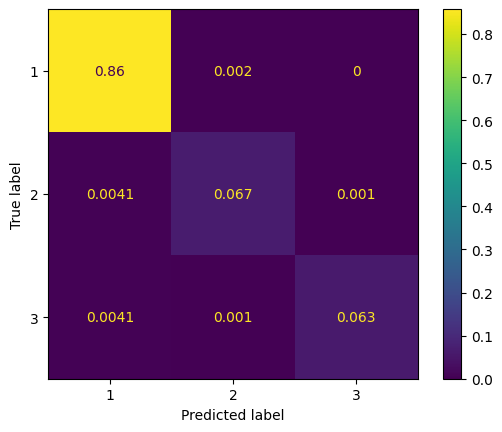

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=tree_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=tree_clf.classes_)
disp.plot()
plt.show()

In [ ]:
# desempeño en clasificacion binaria

def calcular_precision(TP, TN, FP, FN):
    precision = (TP + TN) / (TP + TN + FP + FN)
    precision = precision * 100
    return precision

def calcular_sensibilidad(TP, TN, FP, FN):
    sensibilidad = TP / (TP + FN)
    sensibilidad = sensibilidad * 100
    return sensibilidad

def calcular_especificidad(TP, TN, FP, FN):
    especificidad = TN / (TN + FP)
    especificidad = especificidad * 100
    return especificidad

In [ ]:
# desempeño en clasificacion multiclase

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.9878296146044625

The precision is the ratio tp / (tp + fp) where tp is the number of
true positives and fp the number of false positives. The precision is
intuitively the ability of the classifier not to label as positive a sample
that is negative.

The best value is 1 and the worst value is 0.

In [ ]:
recall_score(y_test, y_pred, average='micro')

0.9878296146044625

The recall is the ratio tp / (tp + fn) where tp is the number of
true positives and fn the number of false negatives. The recall is
intuitively the ability of the classifier to find all the positive samples.

The best value is 1 and the worst value is 0.

In [ ]:
df.shape

(3286, 10)

In [ ]:
df.head(3)

,producto,marca,categoria,grupo,precio_x,marca_tienda,tipo_tienda,municipio,CP,clase_precio
352,0,3,0,0,39.0,5,0,12,01770,1
353,0,3,0,0,39.0,6,0,12,10200,1
354,0,3,0,0,37.0,10,0,12,01000,1


In [ ]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydot

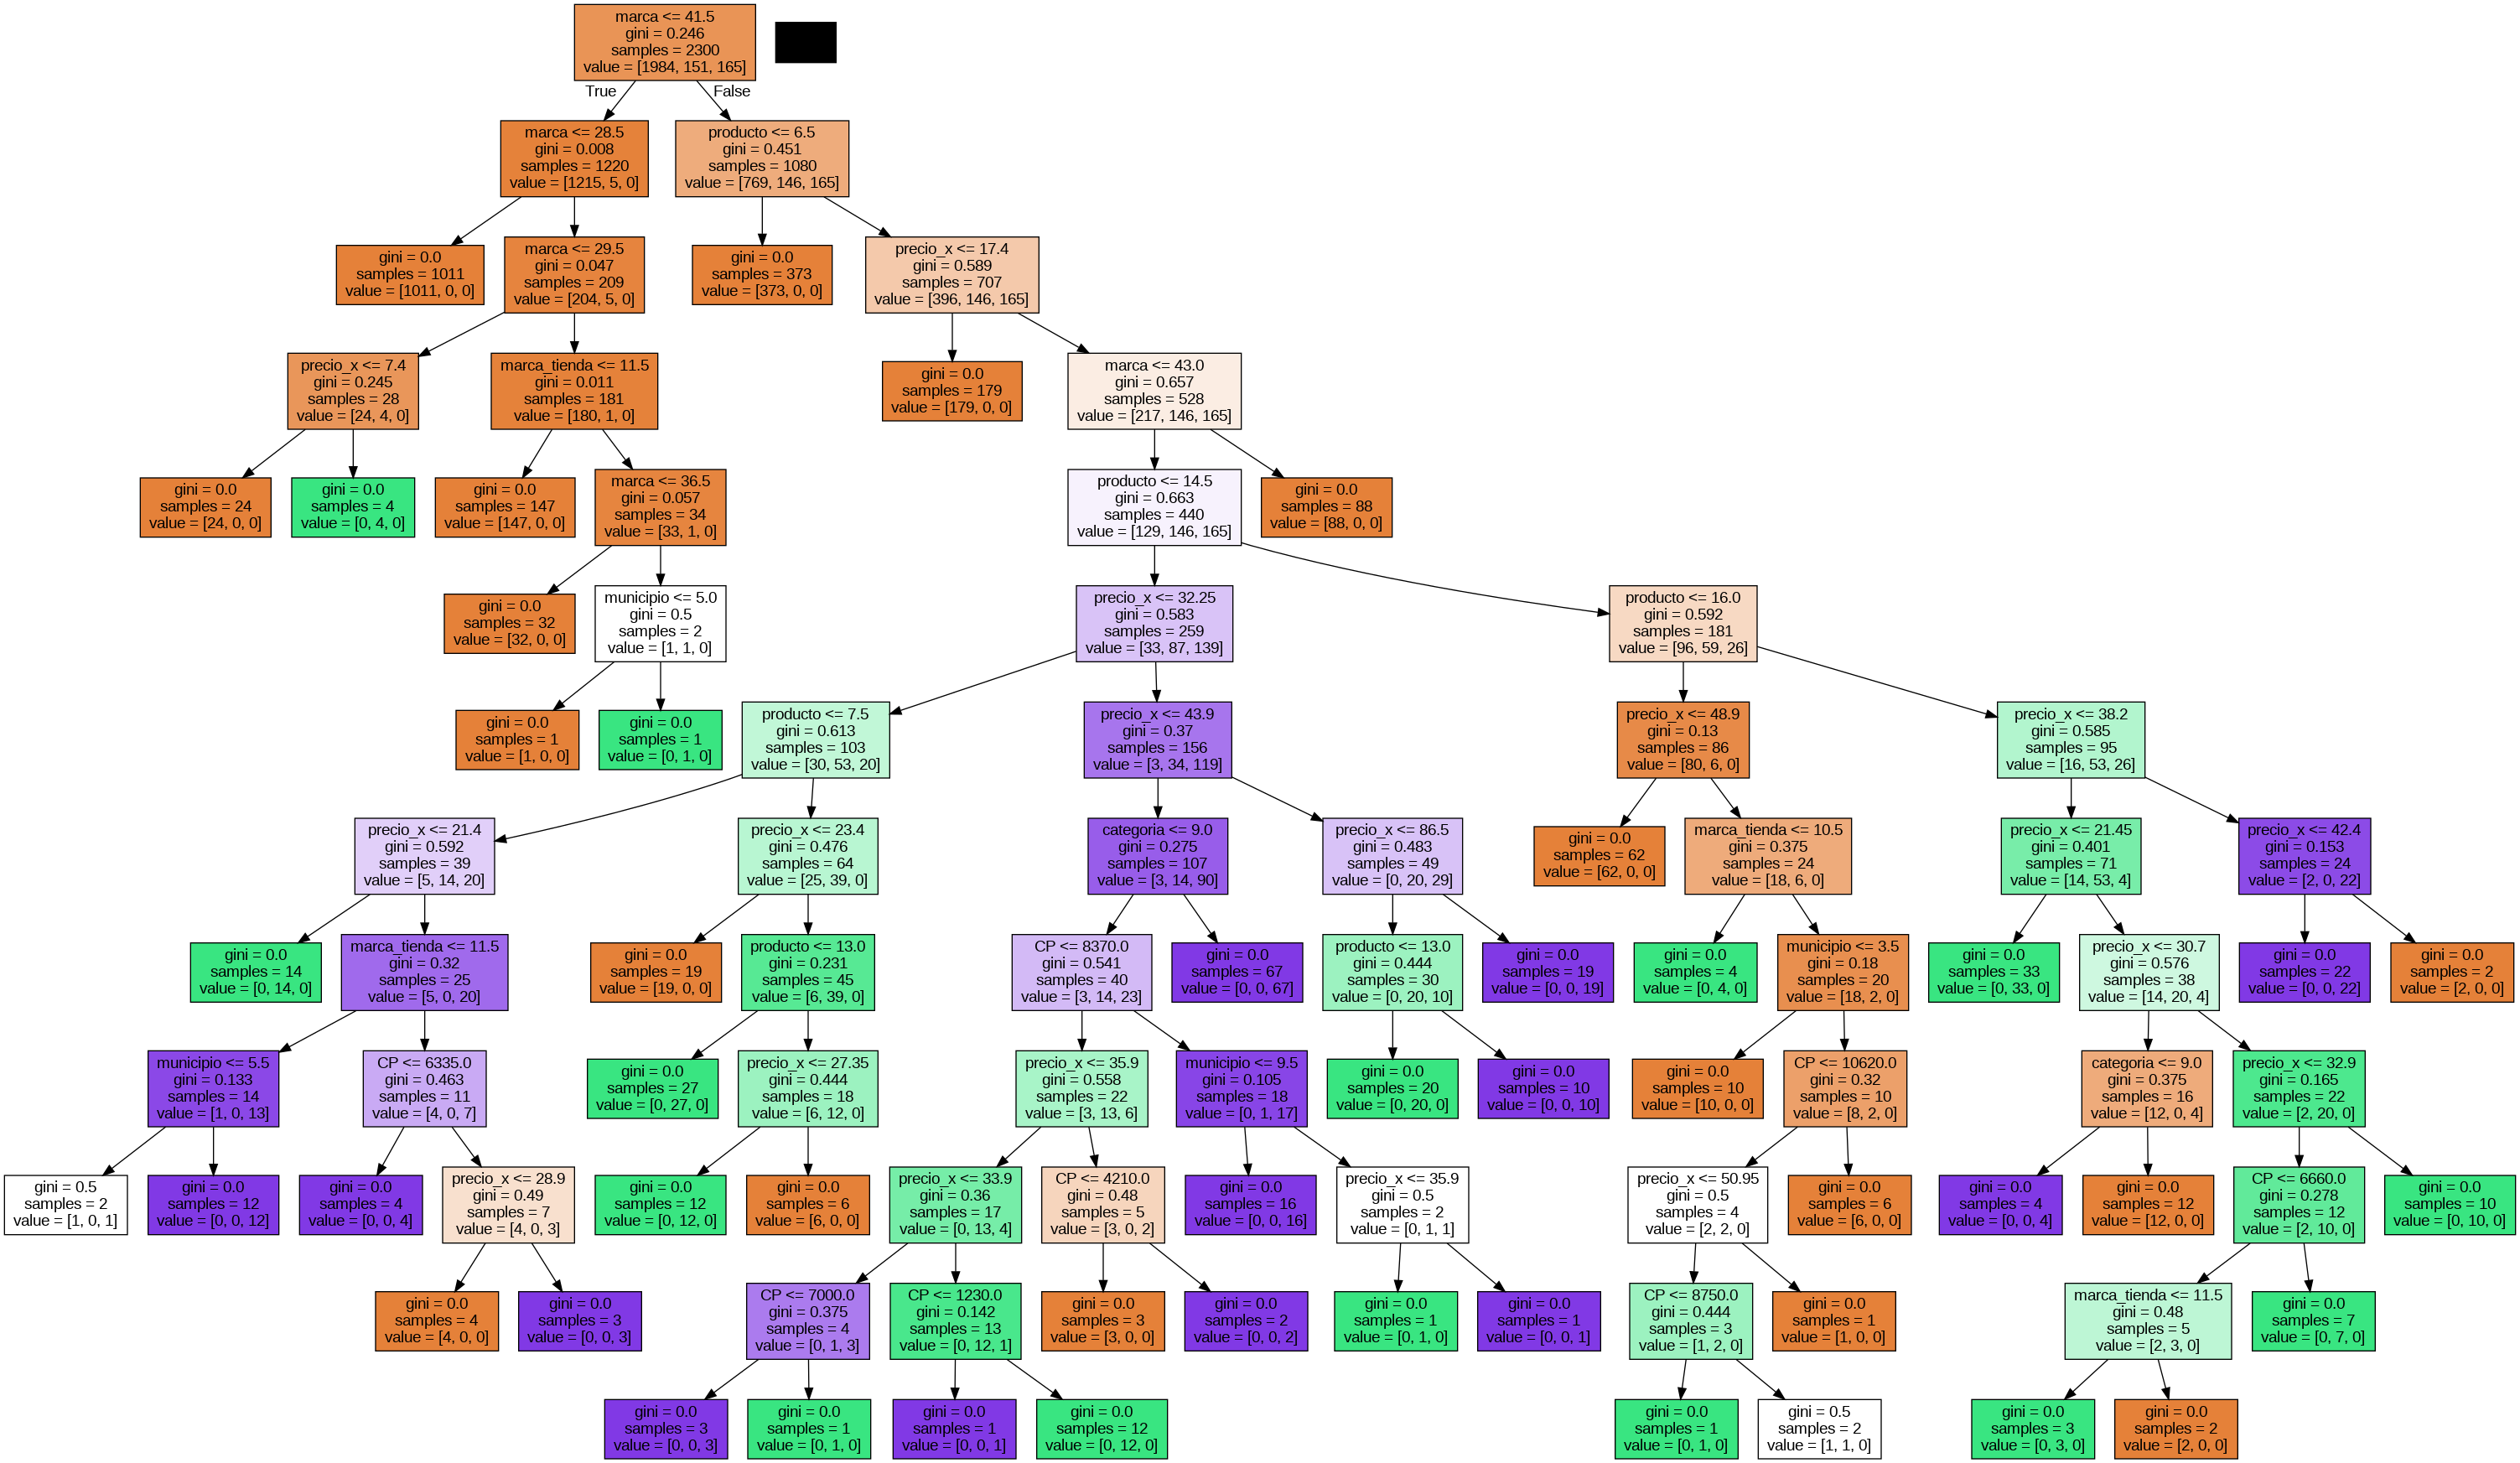

In [ ]:
dot_data = StringIO()
export_graphviz(tree_clf, out_file=dot_data, feature_names=X.columns, filled=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph[0].create_png())

## Hallazgos
- El modelo de árbol de decisión puede clasificar el precio de un producto con un 98% de precisión, esto es que el modelo puede alertar a un consumidor sobre si el precio de un producto puede tener una variación grande respecto al precio mínimo con alta precisión.
- La marca de un producto puede ser uno de los factores más relevantes respecto a su variación respecto al minimo, pero, como se puede observar en la gráfica, pueden intervenir múltiples variables como el producto en si, la categoría, la marca de la tienda, el precio, el municipio, incluso el código postal.


In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
import pandas as pd
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
df = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
def condition(x):
    if x<1.75:
        return 1
    elif x<2.15:
        return 2
    else:
        return 3

In [ ]:
df["clase_precio"] = df['diferencia_minimo'].apply(condition)

In [ ]:
filter1 = df['grupo']=='PACIC'
filter2 = df['estado']=='CIUDAD DE MÉXICO'

df = df[filter1 & filter2]

In [ ]:
df.drop(["presentacion","fecha", "direccion", "nombre_tienda", "estado", "latitud", "longitud","precio_y","diferencia_minimo"], axis="columns", inplace=True)

In [ ]:
categorical_col = []
for column in df.columns:
  if df[column].dtype == object and len(df[column].unique()) < 55:
    categorical_col.append(column)

In [ ]:
le = LabelEncoder()
for column in categorical_col:
  df[column] = le.fit_transform(df[column])

In [ ]:
X = df.drop("clase_precio", axis=1)
y = df.clase_precio

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[847,   3,   2],
       [  7,  58,   1],
       [  0,   5,  63]])

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
import numpy as np
from sklearn.metrics import precision_score, recall_score

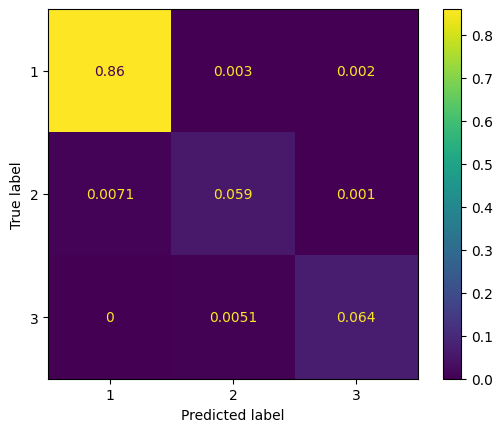

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [ ]:
# desempeño en clasificacion multiclase

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.9817444219066938

In [ ]:
recall_score(y_test, y_pred, average='micro')

0.9817444219066938

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Parámetros del experimento anterior como base para grid search
# n_estimators=100, *, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='sqrt', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, class_weight=None, ccp_alpha=0.0, max_samples=None
n_estimators = [100, 300]
max_features = ['sqrt', 'log2']
max_depth = None
min_samples_split = [2, 4]
min_samples_leaf = [1, 2]
bootstrap = [True]


In [ ]:
params_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap':bootstrap
}

In [ ]:
grid_search_cv = GridSearchCV(rf_clf, params_grid, scoring='f1', cv=3, verbose=1, n_jobs=3)

In [ ]:
grid_search_cv.fit(X_train, y_train)

Fitting 3 folds for each of 16 candidates, totalling 48 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:952: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=3,
             param_grid={'bootstrap': [True], 'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4],
                         'n_estimators': [100, 300]},
             scoring='f1', verbose=1)

In [ ]:
best_params = grid_search_cv.best_params_

In [ ]:
best_params

{'bootstrap': True,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 100}

In [ ]:
rf_clf_optimized = RandomForestClassifier(**best_params)

In [ ]:
rf_clf_optimized.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rf_clf_optimized.predict(X_test)

In [ ]:
matrix = confusion_matrix(y_test, y_pred)

In [ ]:
matrix

array([[847,   2,   3],
       [  8,  58,   0],
       [  0,   4,  64]])

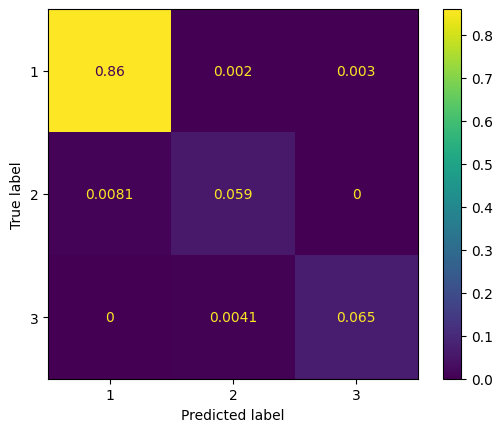

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_, normalize='all')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                               display_labels=rf_clf.classes_)
disp.plot()
plt.show()

In [ ]:
precision_score(y_test, y_pred, average='micro')

0.9827586206896551

In [ ]:
recall_score(y_test, y_pred, average='micro')

0.9827586206896551

### Validación Cruzada para el modelo RandomForest

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from numpy import mean
from numpy import std

In [ ]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)


In [ ]:
scores = cross_val_score(rf_clf_optimized, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Accuracy: 0.985 (0.006)


🏠 [Inicio](#celda-contenido)
<a name="celda-Regresion"></a>
## Modelos de Regresión

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
df_raw = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df_raw.head(3)

,producto,presentacion,marca,categoria,grupo,precio_x,fecha,marca_tienda,tipo_tienda,nombre_tienda,direccion,estado,municipio,latitud,longitud,CP,precio_y,diferencia_minimo
0,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779,20116,47.0,1.191489
1,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL PLAZA GALERIAS,"INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...",AGUASCALIENTES,AGUASCALIENTES,21.922922,-102.297692,20128,47.0,1.191489
2,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.5,2022-12-28,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,20180,47.0,1.202128


In [ ]:
def codificacion_categoria(dataframe, nombre):
  dataframe[nombre] = dataframe[nombre].astype('category').cat.codes

In [ ]:
codificacion_categoria(df_raw, 'producto')
codificacion_categoria(df_raw, 'presentacion')
codificacion_categoria(df_raw, 'marca')
codificacion_categoria(df_raw, 'categoria')
codificacion_categoria(df_raw, 'grupo')
codificacion_categoria(df_raw, 'marca_tienda')
codificacion_categoria(df_raw, 'tipo_tienda')
codificacion_categoria(df_raw, 'estado')

In [ ]:
X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
y = df_raw['diferencia_minimo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

0.1953490725400997

In [ ]:
lr.score(X_test, y_test)

0.0784337659371136

In [ ]:
np.sum(cross_val_score(lr, X, y)) / 5

0.04530192554581571

El score es prácticamente 0, de acuerdo con la documentación de sklearn, significa que el modelo predice siempre el mismo valor para y, sin importar los valores de X de entrada. Lo que llaman, un modelo constante. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
df_raw = pd.read_csv('https://github.com/adavals/bedu-datascience-f3m2/blob/main/dat/532022_transformado.zip?raw=true', compression='zip')

In [ ]:
df_raw.head(3)

,producto,presentacion,marca,categoria,grupo,precio_x,fecha,marca_tienda,tipo_tienda,nombre_tienda,direccion,estado,municipio,latitud,longitud,CP,precio_y,diferencia_minimo
0,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,MEGA SORIANA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,MEGA SORIANA SUCURSAL AGUASCALIENTES,"AGUASCALIENTES NTE. 802, ESQ. BLVD. A ZACATECA...",AGUASCALIENTES,AGUASCALIENTES,21.916001,-102.290779,20116,47.0,1.191489
1,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.0,2022-12-26,WAL-MART,SUPERMERCADO / TIENDA DE AUTOSERVICIO,WALMART SUCURSAL PLAZA GALERIAS,"INDEPENDENCIA 2351, CENTRO COMERCIAL GALERIAS,...",AGUASCALIENTES,AGUASCALIENTES,21.922922,-102.297692,20128,47.0,1.191489
2,ACEITE,BOTELLA 1 LT. VEGETAL,1-2-3,ACEITES Y GRASAS VEG. COMESTIBLES,BASICOS,56.5,2022-12-28,BODEGA AURRERA,SUPERMERCADO / TIENDA DE AUTOSERVICIO,BODEGA AURRERA,"CONVENCION 1914 PTE. 1101, ENTRE A. DE LOS ARE...",AGUASCALIENTES,AGUASCALIENTES,21.886051,-102.312284,20180,47.0,1.202128


In [ ]:
def codificacion_categoria(dataframe, nombre):
  dataframe[nombre] = dataframe[nombre].astype('category').cat.codes

In [ ]:
codificacion_categoria(df_raw, 'producto')
codificacion_categoria(df_raw, 'presentacion')
codificacion_categoria(df_raw, 'marca')
codificacion_categoria(df_raw, 'categoria')
codificacion_categoria(df_raw, 'grupo')
codificacion_categoria(df_raw, 'marca_tienda')
codificacion_categoria(df_raw, 'tipo_tienda')
codificacion_categoria(df_raw, 'estado')

In [ ]:
X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
y = df_raw['diferencia_minimo']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_predict = lr.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

0.1953490725400997

In [ ]:
lr.score(X_test, y_test)

0.0784337659371136

In [ ]:
np.sum(cross_val_score(lr, X, y)) / 5

0.04530192554581571

El score es prácticamente 0, de acuerdo con la documentación de sklearn, significa que el modelo predice siempre el mismo valor para y, sin importar los valores de X de entrada. Lo que llaman, un modelo constante. https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression.score

In [ ]:
X = df_raw[['producto','presentacion','marca','categoria','grupo','marca_tienda','estado','tipo_tienda','longitud','latitud']]
y = df_raw['precio_x']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr2 = LinearRegression()
lr2.fit(X_train, y_train)
y_predict = lr2.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

4790518.190142499

In [ ]:
lr2.score(X_test, y_test)

0.13679525051477337

In [ ]:
np.sum(cross_val_score(lr2, X, y)) / 5

-1.3926488333344267

# Normalización
Considerando sólo las variables del primer experimento

In [ ]:
def z_score(df):
  df_z_score = (df - df.mean()) / df.std()
  return df_z_score

def clip_features(df, iqr_score, clip_top, clip_bottom):
  iqr = df.quantile(0.75) - df.quantile(0.25)
  limite_superior = df.quantile(0.75) + (iqr * iqr_score)
  limite_inferior = df.quantile(0.25) - (iqr * iqr_score)

  new_df = df.copy()

  if (clip_top):
    new_df = np.where(new_df > limite_superior, limite_superior, new_df)
  if (clip_bottom):
    new_df = np.where(new_df < limite_inferior, limite_inferior, new_df)

  return new_df

def escalar_a_01(df):
  df_escalado = (df - df.min()) / (df.max() - df.min())
  return df_escalado

def log(df):
  return np.log(df)

In [ ]:
X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
y = df_raw['diferencia_minimo']

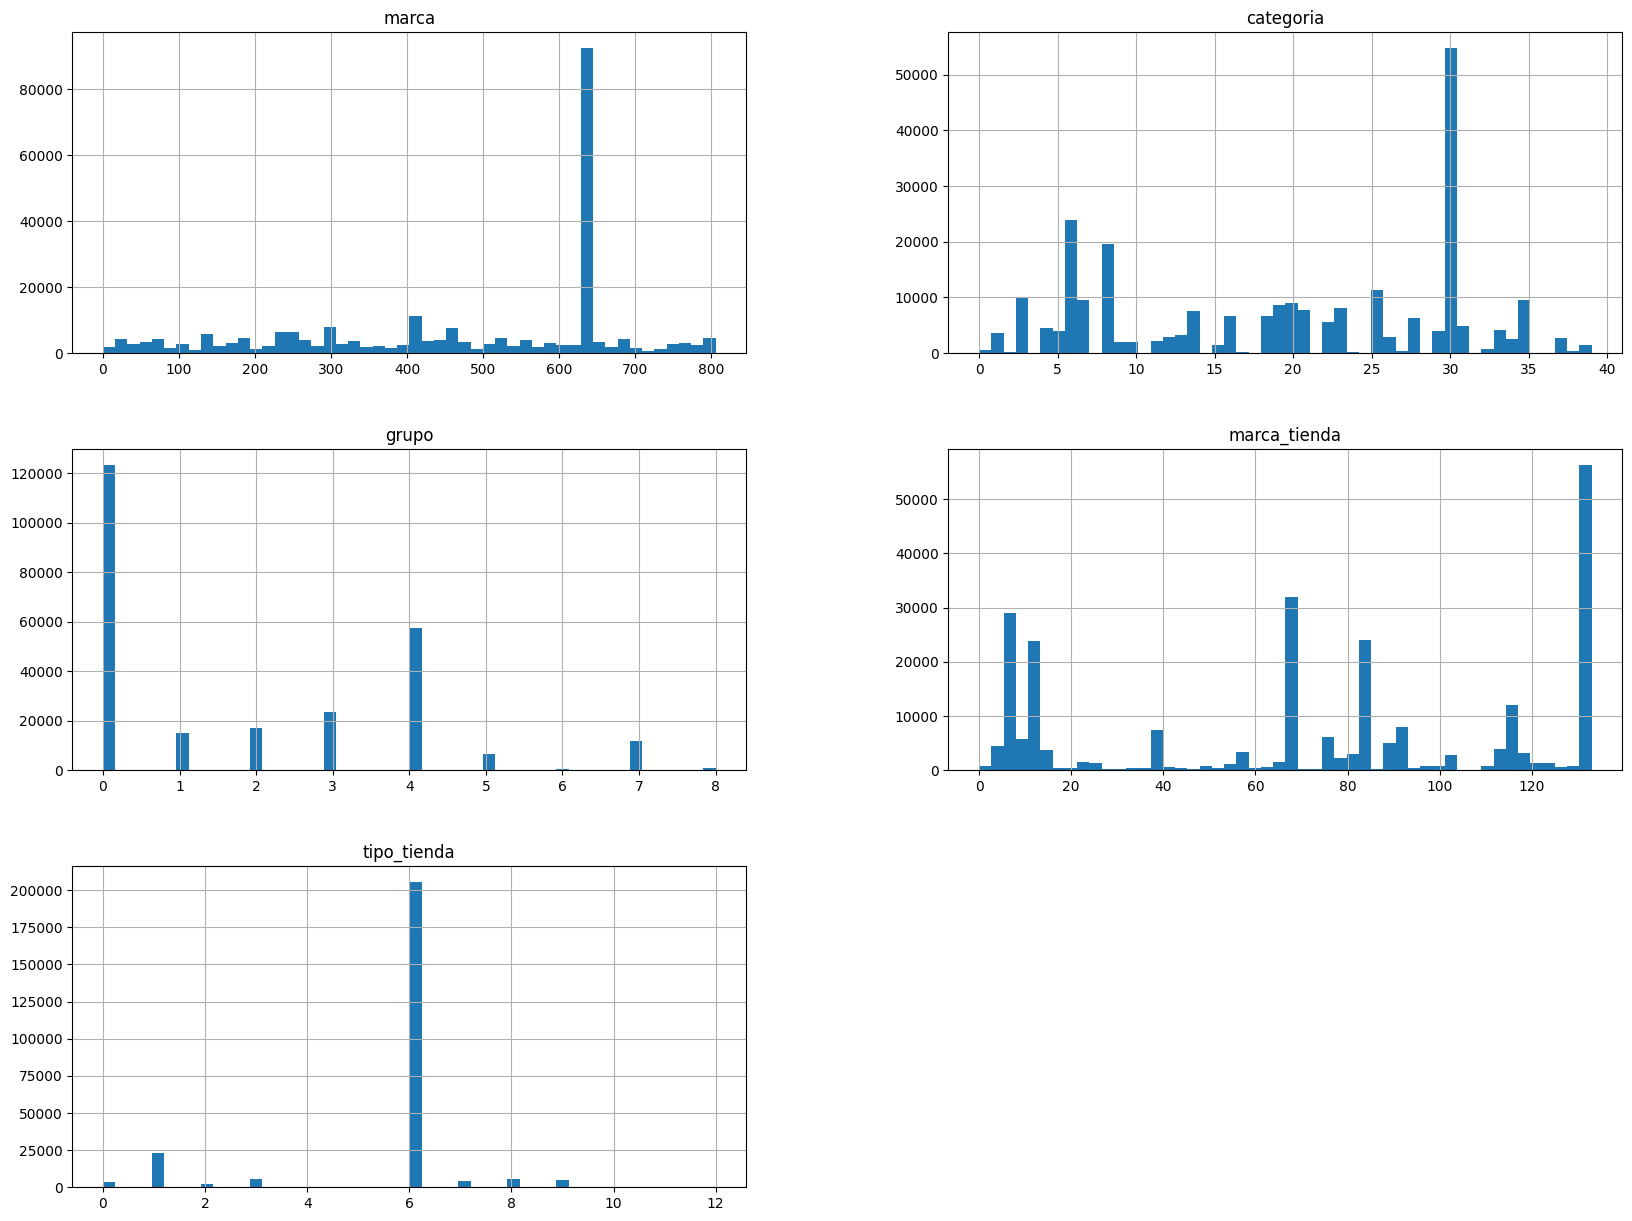

In [ ]:
X.hist(bins=50, figsize=(20, 15));

In [ ]:
X = pd.get_dummies(X)
# df = pd.get_dummies(data=df, columns=['cat_col1','cat_col2'])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
lr3 = LinearRegression()
lr3.fit(X_train, y_train)
y_predict = lr3.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_predict)

4.153960155341823e+16

In [ ]:
lr3.score(X_test, y_test)

-2.0635728291236506e+17

In [ ]:
np.sum(cross_val_score(lr3, X, y)) / 5

-1.2574890295283207e+22

El resultado con variables codificadas es negativo, por lo que el modelo de regresion lineal no es capaz de hacer predicciones asertadas

# Regresion polinomial para variable diferencia_minimo

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
X = df_raw[['producto','presentacion','marca','categoria','grupo','marca_tienda','estado','tipo_tienda','longitud','latitud']]
y = df_raw['diferencia_minimo']

In [ ]:
X.head(3)

,producto,presentacion,marca,categoria,grupo,marca_tienda,estado,tipo_tienda,longitud,latitud
0,2,857,1,1,0,83,0,6,-102.290779,21.916001
1,2,857,1,1,0,131,0,6,-102.297692,21.922922
2,2,857,1,1,0,6,0,6,-102.312284,21.886051


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)
print(f"R2 Train: {lr_2.score(X_train_2, y_train)}")
print(f"R2 Test: {lr_2.score(X_test_2, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_2, X_train_2, y_train)) / 5}")

R2 Train: 0.1917864704619726
R2 Test: 0.1921849833967545
Cross Val: 0.19127496420065676


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train)
print(f"R2 Train: {lr_3.score(X_train_3, y_train)}")
print(f"R2 Test: {lr_3.score(X_test_3, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_3, X_train_3, y_train)) / 5}")

R2 Train: 0.2430477167128473
R2 Test: 0.2410216083332517
Cross Val: 0.24059713307117875


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train)
print(f"R2 Train: {lr_4.score(X_train_4, y_train)}")
print(f"R2 Test: {lr_4.score(X_test_4, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_4, X_train_4, y_train)) / 5}")

R2 Train: 0.2899909581533532
R2 Test: 0.27941195952069375
Cross Val: 0.28179948056966514


In [ ]:
poly_5 = PolynomialFeatures(degree=5)
X_train_5 = poly_5.fit_transform(X_train)
X_test_5 = poly_5.fit_transform(X_test)

lr_5 = LinearRegression()
lr_5.fit(X_train_5, y_train)
print(f"R2 Train: {lr_5.score(X_train_5, y_train)}")
print(f"R2 Test: {lr_5.score(X_test_5, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_5, X_train_5, y_train)) / 5}")

#### ***Fallo de memoria agotada en colab al usar 5 grados***

# Regresion polinomial para variable precio_x

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
# X = df_raw[['marca','categoria','grupo','marca_tienda','tipo_tienda']]
X = df_raw[['producto','presentacion','marca','categoria','grupo','marca_tienda','estado','tipo_tienda','longitud','latitud']]
y = df_raw['precio_x']

In [ ]:
X.head(3)

,producto,presentacion,marca,categoria,grupo,marca_tienda,estado,tipo_tienda,longitud,latitud
0,2,857,1,1,0,83,0,6,-102.290779,21.916001
1,2,857,1,1,0,131,0,6,-102.297692,21.922922
2,2,857,1,1,0,6,0,6,-102.312284,21.886051


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
poly_2 = PolynomialFeatures(degree=2)
X_train_2 = poly_2.fit_transform(X_train)
X_test_2 = poly_2.fit_transform(X_test)

lr_2 = LinearRegression()
lr_2.fit(X_train_2, y_train)
print(f"R2 Train: {lr_2.score(X_train_2, y_train)}")
print(f"R2 Test: {lr_2.score(X_test_2, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_2, X_train_2, y_train)) / 5}")

R2 Train: 0.33563779707634755
R2 Test: 0.3335111597811652
Cross Val: 0.3345176691039514


In [ ]:
poly_3 = PolynomialFeatures(degree=3)
X_train_3 = poly_3.fit_transform(X_train)
X_test_3 = poly_3.fit_transform(X_test)

lr_3 = LinearRegression()
lr_3.fit(X_train_3, y_train)
print(f"R2 Train: {lr_3.score(X_train_3, y_train)}")
print(f"R2 Test: {lr_3.score(X_test_3, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_3, X_train_3, y_train)) / 5}")

R2 Train: 0.47415842167168953
R2 Test: 0.4741229798384323
Cross Val: 0.47076935418739796


In [ ]:
poly_4 = PolynomialFeatures(degree=4)
X_train_4 = poly_4.fit_transform(X_train)
X_test_4 = poly_4.fit_transform(X_test)

lr_4 = LinearRegression()
lr_4.fit(X_train_4, y_train)
print(f"R2 Train: {lr_4.score(X_train_4, y_train)}")
print(f"R2 Test: {lr_4.score(X_test_4, y_test)}")
print(f"Cross Val: {np.sum(cross_val_score(lr_4, X_train_4, y_train)) / 5}")

R2 Train: 0.57856783612722
R2 Test: 0.5727337092961038
Cross Val: 0.570101274649832


<a name="celda-referencias"></a>
🏠 [Inicio](#celda-contenido)  
## Referencias

- Documentación

  - [scikit-learn](https://scikit-learn.org/stable/)

- Artículos en internet:
  - https://machinelearningmastery.com/how-to-configure-k-fold-cross-validation/
